In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

from utils.statistics import check_normality, check_homoscedasticity, check_group_difference

## Exponential Smoothing

### Hyperparameters

In [2]:
df = pd.read_csv("../results/tuning/exponential_smoothing.csv", sep=";")
df = df[df["SeasonalPeriod"]!=-1] # drop ensemble results
metric = "F1-Score"
assert check_normality(df[metric])
for hparam in ["LookBackWindowSize", "Method"]:
    assert check_homoscedasticity(*[df[df[hparam]==val][metric] for val in df[hparam].unique()])

#### Method

Significant group difference: False
Method
L-BFGS-B    49
Powell      50
SLSQP       49
Name: F1-Score, dtype: int64


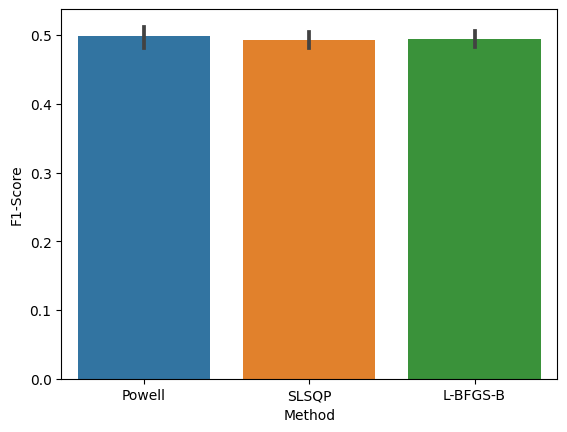

In [3]:
print("Significant group difference:", check_group_difference(df[df["Method"]==True][metric], df[df["Method"]==False][metric]))
print(round(df.groupby("Method")[metric].mean()*100).astype(int))
sns.barplot(x="Method", y=metric, data=df);

#### Look Back Window Size

Significant group difference: False
LookBackWindowSize
260     48
520     50
780     51
1300    49
Name: F1-Score, dtype: int64


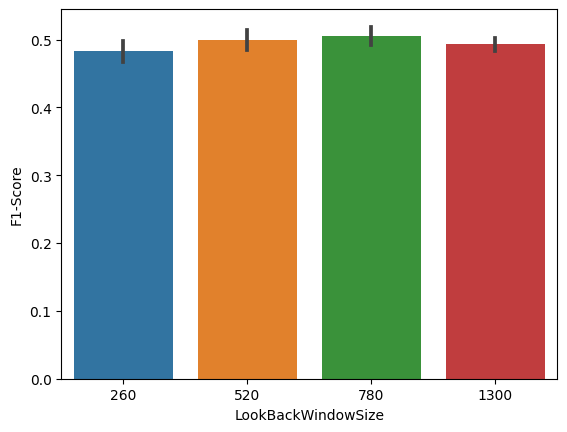

In [4]:
print("Significant group difference:", check_group_difference(df[df["LookBackWindowSize"]==True][metric], df[df["LookBackWindowSize"]==False][metric]))
print(round(df.groupby("LookBackWindowSize")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y=metric, data=df);

#### Seasonality

SeasonalPeriods = -1 represents EnsembleForecaster([("simple", ExponentialSmoothing(method="Powell")), ("seasonal", ExponentialSmoothing(seasonal="add", sp=5, method="Powell"))]).

Significant group difference: False


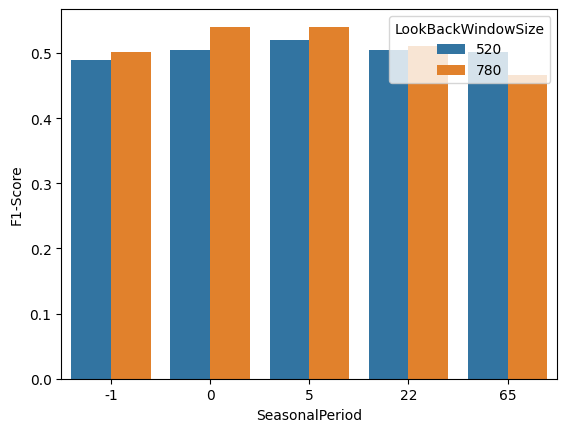

In [5]:
df = pd.read_csv("../results/tuning/exponential_smoothing.csv", sep=";") # reload to include ensemble result
df = df[df["Method"]=="Powell"]
df = df[df["LookBackWindowSize"].isin([520, 780])]
print("Significant group difference:", check_group_difference(df[df["SeasonalPeriod"]==True][metric], df[df["SeasonalPeriod"]==False][metric]))
sns.barplot(x="SeasonalPeriod", y=metric, hue="LookBackWindowSize", data=df);

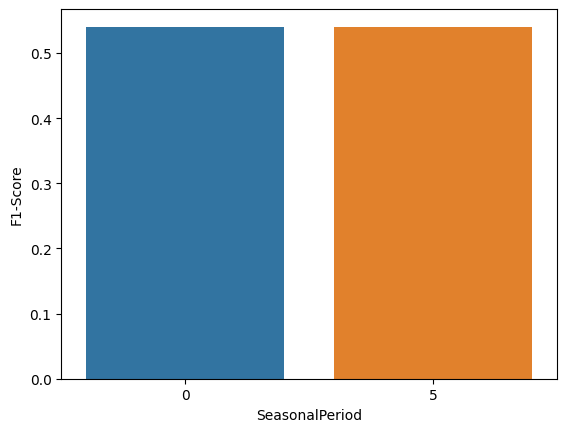

In [6]:
sns.barplot(x="SeasonalPeriod", y=metric, data=df[(df["LookBackWindowSize"]==780) & (df["SeasonalPeriod"].isin([0, 5]))]);

### Conclusion
- The optimization method makes no significant difference: 'Powell' seems like a good choice.
- The 'look_back_window_size', as long as it's at least a year, doesn't make much of a difference, so set it to 780 (3 years), which achieves the highest results.
- A Winters model with seasonality is not significantly better than Simple Exponential Smoothing, so stick to the latter.